In [1]:
using Pkg
Pkg.activate("./TamboMap/")
using TamboMap

  Activating project at `~/talks/lemaitre_chair/TamboMap`


In [5]:
using CairoMakie, GeoMakie

In [6]:
using GeoMakie.GeoJSON
countries_file = GeoMakie.assetpath("vector", "countries.geo.json")
countries = GeoJSON.read(read(countries_file, String))

FeatureCollection with 180 Features

In [22]:
institutions = TamboMap.institutions_from_json("./TamboMap/institutions/")

13-element Vector{TamboMap.Institution}:
 TamboMap.Institution("Columbia University", TamboMap.Location("United States of America", "New York"))
 TamboMap.Institution("Donostia International Physics Center", TamboMap.Location("Spain", "San Sebastián"))
 TamboMap.Institution("Harvard University", TamboMap.Location("United States of America", "Cambridge"))
 TamboMap.Institution("Jet Propoulsion Laboratory", TamboMap.Location("United States of America", "Pasadena"))
 TamboMap.Institution("Niels Bohr Institute", TamboMap.Location("Denmark", "Copenhagen"))
 TamboMap.Institution("Pontifical Catholic University of Peru", TamboMap.Location("Peru", "Lima"))
 TamboMap.Institution("Queen's College", TamboMap.Location("Canada", "Kingston"))
 TamboMap.Institution("The Pennsylvania State University", TamboMap.Location("United States of America", "State College"))
 TamboMap.Institution("The University of Adelaide", TamboMap.Location("Australia", "Adelaide"))
 TamboMap.Institution("Universidade De San

In [23]:
function make_map(
    institutions::Vector{TamboMap.Institution};
    ocean_color = :black,
    country_color_yes = :yellow,
    country_color_no = :grey,
)
    lons = -180:180
    lats = -90:90
    
    inst_countries = getfield.(getfield.(institutions, :location), :country)
    
    color = [
        country.name in inst_countries ? country_color_yes : country_color_no 
        for country in countries
    ]

    map = Figure()
    ax = GeoAxis(map[1,1])
    field = [1 for _ in lons, _ in lats]

    surface!(ax, lons, lats, field; colormap=[ocean_color, ocean_color])

    hm = poly!(ax, countries; color=color,
        strokecolor = :black, strokewidth = 0.5,
    )
    translate!(hm, 0, 0, 100) # move above surface plot

    return map
end

make_map (generic function with 1 method)

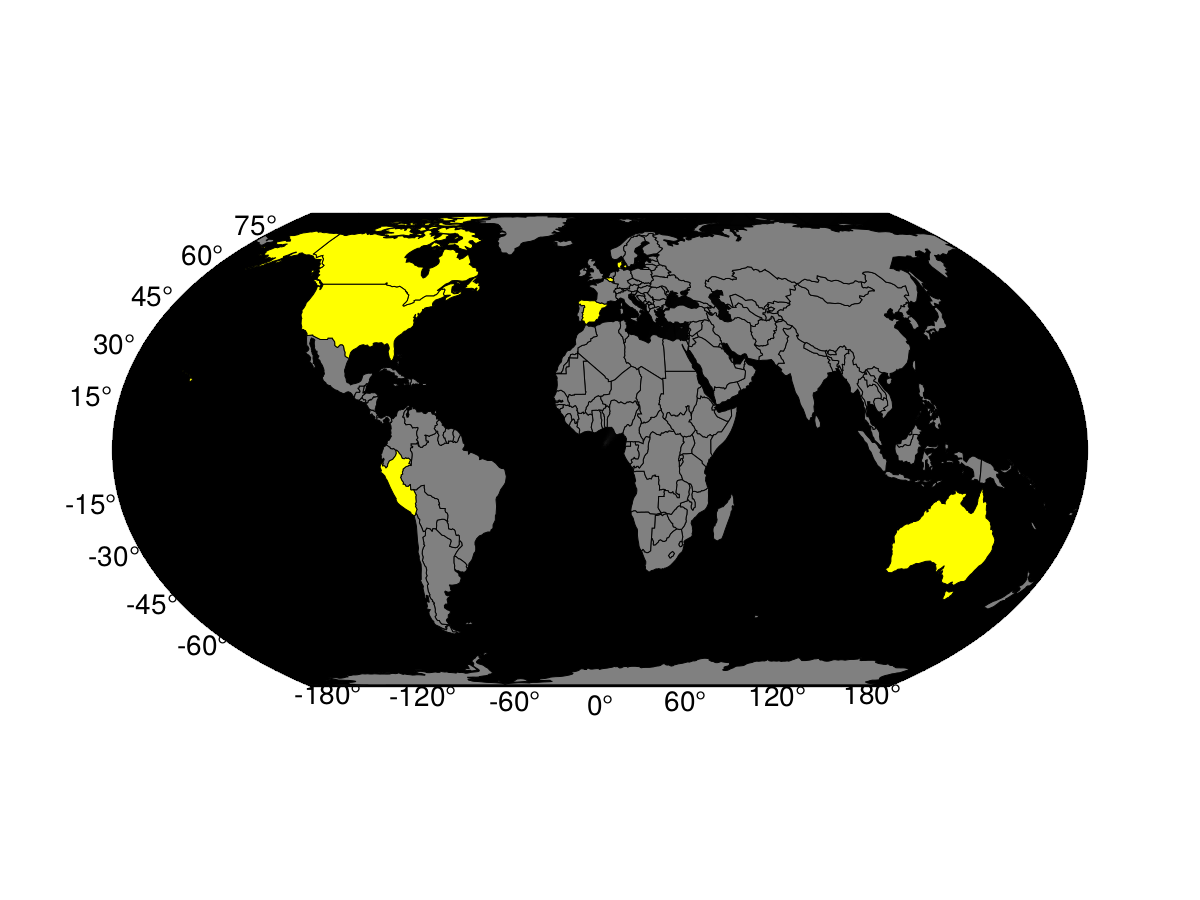

In [24]:
make_map(institutions)